# Linear Regression using TensorFlow.
1. We will use raw TensorFlow to fit a line to our dataset. We will use random numbers as a dataset (contains 1 feature).
2. Extend the example to perform linear regression on 1million examples with the help of batches (provide batches during train).

#### Credits:
These examples are inspired by following online Udemy course: 
- Complete Guide to TensorFlow for Deep Learning with Python by Jose Portilla
 

## 1. Simple linear regression using a small dataset


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(101)

In [3]:
x_data = np.linspace(1, 10, 20) + np.random.uniform(high=1, low=-1, size=20)
x_data

array([1.03279726, 1.61501938, 1.00431687, 1.76409594, 3.26529081,
       4.03621478, 3.4560377 , 5.10301563, 5.23256141, 4.6430358 ,
       5.84529729, 5.91479022, 6.04799533, 7.72909826, 8.56254539,
       7.56997048, 7.74607024, 9.25972842, 9.9843013 , 9.55247766])

In [4]:
y_label = np.linspace(1,10,20) + np.random.uniform(high=2, low=-2, size=20)

y_label

array([ 1.74122532,  1.54515411,  0.14130657,  0.97252958,  1.64260655,
        5.34569266,  3.92476685,  4.63094762,  5.72874992,  5.43100498,
        7.38945634,  7.44220692,  6.29620185,  6.58679211,  9.44308581,
        7.47978947, 10.03934663, 10.37374243,  9.67896159, 11.68987749])

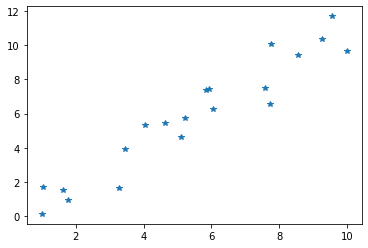

In [9]:
plt.plot(x_data, y_label,'*')

## Define the cost function
- y = wx + b

We already have `x_data` and `y_label` as our training data. Both these are Numpy arrays, however `w` and `b` are Tensorflow variables.

In [15]:
b = tf.Variable(initial_value=0.85)
w = tf.Variable(initial_value=0.60)

# Just give any value to error. error is our cost function
error = 0

for x,y in zip(x_data, y_label):
    new_y = w*x + b
    error += (y-new_y)**2

## Create the optimizer for GradientDecent

In [16]:
cost_function = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = cost_function.minimize(loss=error )

RuntimeError: `loss` passed to Optimizer.compute_gradients should be a function when eager execution is enabled.

## Train the Neural Network - train `w` and `b`
- Optimize the cost function `error`

In [ ]:
epoch = 100
init = tf.global_variables_initializer()

trained_w = 0
trained_b = 0

with tf.Session() as session:
    session.run(init)
    
    for x in range(epoch):
        session.run(train)
    
    trained_w,trained_b = session.run([w,b])
    
    print(" Trained values : trained_w {} trained_b {}".format(trained_w, trained_b))

## Display the decision boundary learned by the model (Line which fits the data best)

In [ ]:
x_trained = np.linspace(1,10, 20)
y_trained = x_trained * trained_w + trained_b

In [ ]:
plt.plot(x_data, y_label,'*')
plt.plot(x_trained, y_trained)


## 2. Example of using batches to train with large dataset (1 million points)

In [ ]:
dataset_size = 1000000
x_large = np.linspace(start=1, stop=10, num=dataset_size) + np.random.uniform(high=2, low=-2, size=dataset_size)
y_large = np.linspace(start=1, stop=10, num=dataset_size) + np.random.uniform(high=2, low=-2, size=dataset_size)

# Plot a random sample
samples = 100
random_sample_indexes = np.random.randint(0, high=dataset_size, size=samples)
plt.plot(x_large[random_sample_indexes], y_large[random_sample_indexes], "*")

In [ ]:
#  Variables
batch_size = 8

w = tf.Variable(0.86)
b = tf.Variable(0.21)
xPH = tf.placeholder(shape=[batch_size], dtype=tf.float32)
yPH = tf.placeholder(shape=[batch_size], dtype=tf.float32)

# Function:
y_prediction =  w * xPH + b

# Cost Function
cost = tf.reduce_sum(tf.square(yPH - y_prediction))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
cost_optimizer = optimizer.minimize(cost)

# Train the model
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for x in range(1000):
        random_indexes = np.random.randint(0, high=dataset_size, size=batch_size)
        feed_dict_map = {
            xPH : x_large[random_indexes],
            yPH : y_large[random_indexes]
        }
        session.run(cost_optimizer, feed_dict=feed_dict_map)
        
    w_trained, b_trained = session.run([w,b])

    print(w_trained, b_trained)

## Plot samples using the trained `w` and `b` parameters

In [ ]:
random_sample_indexes = np.random.randint(0, high=dataset_size, size=samples)

y_predicton = w_trained * x_large + b_trained

plt.plot(x_large[random_sample_indexes], y_predicton[random_sample_indexes], 'r')
plt.plot(x_large[random_sample_indexes], y_large[random_sample_indexes], '*')
